# Chapter 5
# Events

In [1]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import warnings

In [2]:
warnings.filterwarnings("ignore") # surpress warnings

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
url="https://www.stadt-koeln.de/leben-in-koeln/veranstaltungen/index.html?from=20190801&to=20211101"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
calendar = soup.find(id="veranstaltungssuchergebnis")

category=soup.find(id='veranstaltung_kategorie')
#category


cat={}
for option in category.find_all('option'):
    cat[option.text]=option['value']
    #print (option['value'], option.text)


del cat['Alle Kategorien']
cat

{'Ausstellung': '27',
 'Bauleitplanung Öffentlichkeitsbeteiligung': '92',
 'Beratung': '83',
 'Bürgerhaus Kalk': '44',
 'Bürgerhaus Stollwerck': '32',
 'Bürgerzentrum Chorweiler': '91',
 'Dezernat III': '90',
 'Digital': '88',
 'Diskussion': '85',
 'Existenzgründung': '49',
 'Familie': '75',
 'Ferienprogramm': '28',
 'Film': '46',
 'Frauen + Gleichstellung': '45',
 'Führung': '23',
 'Geschichte': '52',
 'Gesundheit': '89',
 'Historisches Archiv': '71',
 'Interkulturelle Woche': '43',
 'Internationales': '80',
 'Kabarett': '15',
 'Kinder + Jugend': '21',
 'Kleinkunst': '13',
 'Konzert': '7',
 'Kultur': '99',
 'Lesung': '37',
 'Literatur': '53',
 'Menschen mit Behinderungen': '60',
 'Messen': '94',
 'Museum': '50',
 'Natur und Grün': '17',
 'Planen und Bauen': '74',
 'Radfahren': '96',
 'Rathaussaal Porz': '101',
 'Rheinische Musikschule': '14',
 'Seniorinnen und Senioren': '34',
 'Sonstige Veranstaltungen': '12',
 'Sport': '64',
 'Stadtbibliothek': '59',
 'Städtepartnerschaft': '42',
 '

In [5]:
# Import merchants
m_df=gpd.read_file('../data/co_store_delta.geojson', index_col='Id').to_crs(5676)
m_df.index=m_df.Id
m_df.head(2)

,Id,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,StreetAddress,City,SellsOfflineCards,check_ins,check_outs,delta,cater_in,cater_out,cater_delta,cater_out_ratio,geometry
Id,,,,,,,,,,,,,,,,,,
37750976-cd54-44a5-a05a-d85d3cc9035b,37750976-cd54-44a5-a05a-d85d3cc9035b,2c1b374d-3d05-4b74-a260-a479c8ef9232,Krua Thai 2 - Heumarkt,6.960161,50.935471,2020-10-20T20:04:31.643000+02:00,2,Heumarkt 25,Köln,False,4607.0,-5932.0,-1325.0,6.0,0.0,6.0,-0.0,POINT (2567537.344 5644907.201)
d4e38d94-eb54-4049-b721-4da7c79f3891,d4e38d94-eb54-4049-b721-4da7c79f3891,2c9fdbe4-3e32-4916-ba19-147258d0dd1d,Fenster zum Hof,6.944754,50.948689,2019-09-22T21:53:24.931000+02:00,2,Im Mediapark 5,Köln,False,60.0,-47.0,13.0,0.0,0.0,0.0,-0.0,POINT (2566435.535 5646363.617)


In [6]:
# Import customer list
e_df=pd.read_csv('../data/events.csv', sep=',',index_col='Unnamed: 0').sort_index()



e_df['start_date']= pd.to_datetime(e_df['start_date'],errors='coerce')
e_df['end_date']= pd.to_datetime(e_df['end_date'],errors='coerce')

e_df.head(2)

from shapely.geometry import Point
import geopandas as gpd
e_gdf = gpd.GeoDataFrame(e_df, geometry=gpd.points_from_xy(e_df['longitude'], e_df['latitude'])).set_crs(4326, allow_override=True).to_crs(5676)
#e_gdf.head(2)


(e_gdf['end_date']-e_gdf['start_date']).tail(2)

e_gdf['date']=e_gdf['start_date']
e_gdf.index = pd.MultiIndex.from_tuples(zip(e_gdf.index,e_gdf.date), names=['event_name', "date"])
del e_gdf['date']
e_gdf.head(2)

address  \
event_name                                         date                                                            
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03  Willy-Brandt-Gesamtschule\n\nIm Weidenbruch 21...   
                                                   2020-04-03  Willy-Brandt-Gesamtschule\n\nIm Weidenbruch 21...   

                                                              start_date  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03 2020-04-03   
                                                   2020-04-03 2020-04-03   

                                                                end_date  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03 2020-04-05   
                                                   2020-04-03 2020-04-05   

                                                                                                     description  \
event_name                                         date                                                            
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03  Die Veranstaltung findet zu diesem Zeitpunkt n...   
                                                   2020-04-03  Die Veranstaltung findet zu diesem Zeitpunkt n...   

                                                              time  latitude  \
event_name                                         date                        
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03  NaN  50.98415   
                                                   2020-04-03  NaN  50.98415   

                                                               longitude  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03   7.041542   
                                                   2020-04-03   7.041542   

                                                                               event_type  \
event_name                                         date                                     
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03             Internationales   
                                                   2020-04-03  Menschen mit Behinderungen   

                                                              start_time  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03        NaN   
                                                   2020-04-03        NaN   

                                                              end_time  \
event_name                                         date                  
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03      NaN   
                                                   2020-04-03      NaN   

                                                                                      geometry  
event_name                                         date                                         
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2020-04-03  POINT (2573181.358 5650400.015)  
                                                   2020-04-03  POINT (2573181.358 5650400.015)

In [7]:
selected_events=e_gdf['event_type'].isin(['Konzert','Messen','Vortrag','Theater', 'Ferienprogramm', 'Tanz'])

In [8]:
e_gdf=e_gdf[selected_events]
#e_gdf=e_gdf.sort_index()
print(e_gdf.shape)
e_gdf.head()

(1312, 11)


address  \
event_name                                         date                                                            
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-09-01            Heumarkt\n\n50667\nKöln - Altstadt/Nord   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-10-02  Bürgerhaus Stollwerck\n\nDreikönigenstraße 23\...   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-02                Diverse Veranstaltungsorte in\nKöln   
                                                   2019-11-02                Diverse Veranstaltungsorte in\nKöln   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-15  Rathaussaal Porz\n\nFriedrich-Ebert-Ufer 64-70...   

                                                              start_date  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-09-01 2019-09-01   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-10-02 2019-10-02   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-02 2019-11-02   
                                                   2019-11-02 2019-11-02   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-15 2019-11-15   

                                                                end_date  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-09-01 2019-09-01   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-10-02 2019-10-02   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-02 2019-11-02   
                                                   2019-11-02 2019-11-02   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-15 2019-11-16   

                                                                                                     description  \
event_name                                         date                                                            
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-09-01  Oberbürgermeisterin Henriette Reker dankt mit ...   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-10-02  Theater 509 präsentiert Ausschnitte aus versch...   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-02  Die Kölner Museumsnacht feiert in diesem Jahr ...   
                                                   2019-11-02  Die Kölner Museumsnacht feiert in diesem Jahr ...   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-15  27. Rock & Chanson Festival 2019 "Köln-Breslau...   

                                                                                                            time  \
event_name                                         date                                                            
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-09-01                                     13 bis 17 Uhr    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-10-02                                            20 Uhr    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-02                                            19 Uhr    
                                                   2019-11-02                                            19 Uhr    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-15  Freitag, 15. November 2019, 19 Uhr\nSamstag, 1...   

                                                                latitude  \
event_name                                         date                    
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-09-01  50.936758   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-10-02  50.925280   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-02  50.938108   
                                                   2019-11-02  50.938108   
https://www.stadt-koeln.de/leben-in-koeln/freiz... 2019-11-15  50.885600   

                                                               long

In [9]:
e2_gdf=e_gdf.copy()
for (event_name,date),row in e_gdf.iterrows():
    date_list=pd.date_range(row['start_date'],row['end_date'],freq='d')
    #print(event_name)
    #print(date)
    #print(row.to_dict())
    #print(list(row))
    #print(date_list)
    if len(date_list)<2: continue
    for date_e in date_list[1:]:
        #print(date_e)
        e2_gdf.loc[(event_name,date_e),:]=list(row)
        #df=pd.DataFrame(row.to_dict(), index=(event_name,date_e))
        #e_gdf=pd.concat([e_gdf,df])

In [10]:
e_gdf.shape

(1312, 11)

In [11]:
e2_gdf.shape

(3909, 11)

In [12]:
e2_gdf.index.is_unique

False

In [13]:
e2_gdf=e2_gdf.drop_duplicates()

In [14]:
# create a buffer zone with a radius of 500 m around the stores
x=m_df.geometry.buffer(500)


events = e2_gdf.assign(**{key: e_gdf.within(geom) for key, geom in x.items()})

In [15]:

events=events.reset_index().set_index('date')

In [16]:
events.iloc[:,27:]

,cf959654-b04f-40e1-a89e-0d6f1af85e6d,1caa6395-d586-4dcf-ad28-264b04ca5b86,e116f65d-0f56-4c90-b0d6-842a7d4c4e87,e6aaf3cc-44ef-408d-8a98-e3063716d05b,242b7fbd-ee38-40cc-a301-12eff13bf676,a343fe01-1825-437d-a69b-41232f033269,84756730-9ef1-4513-8653-2c298689602c,a3795006-f7c3-44a2-8c87-8e19fb9b7295,925d72e6-ff1d-4f64-b0d8-52e14ae08861,e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea,...,69261163-09b2-4ff6-ab9a-8c87c7c2bee6,c186b460-80a0-4f08-99e7-ae07c850c029,1428112d-9cde-4ebf-9050-0d0c69c3909b,46ed6232-1c4a-4779-92e0-1b52a501753e,d70061f2-c50f-48cd-a849-7f569482bdc8,504504e5-41f4-411d-a2f7-8bbc59b86384,ebbeabd8-0201-4af9-b9fa-a997abcb6bfb,84bcefe2-c3f2-4214-8342-e78b83bcacdc,825df884-f2cd-4c89-bf27-b63042035435,ed06f80c-db3c-4167-9dd2-d1bd7c5da1c5
date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-10-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-11-02,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2019-11-02,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2019-11-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-12,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2020-07-20,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2020-07-20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
# Choose the time window for the analysis

begin_date=dt.datetime(2019, 8, 1, 0, 0, 0, tzinfo=dt.timezone.utc)
end_date=dt.datetime(2021, 11, 1, 23, 59, 0, tzinfo=dt.timezone.utc)



# drop the redundant columns 
drop_list=['IsBillableTransaction', 'ReturnDeadline', 'Status','LastReturnReminderSent', 'LocationNumber',
       'DeliveryTokenId', 'LastStatusUpdateAt', 'IsSelfScan','station_id_x','station_id_y','Unnamed: 0',
           'OwnerSince_r','next_owner_store_id','Source', 'Target','TransactionId',]
# read csv
out_df=pd.read_csv('../data/c_co_out.csv', sep=',', low_memory=False).rename(columns={'TypeId':'ContainerTypeId'})
print(out_df.shape)
try:
    out_df=out_df.drop(drop_list, axis=1)
except: 
    print(out_df.shape)




out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince'],errors='coerce',utc=True).dt.tz_convert(tz='Europe/Berlin')
out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill'],errors='coerce',utc=True).dt.tz_convert(tz='Europe/Berlin')



begin_=out_df['OwnerSince']>begin_date
end_=out_df['OwnerSince']<end_date

out_df=out_df[begin_ & end_]

out_df.head(2)

(163854, 16)
(163854, 16)


,Unnamed: 0,OwnerId,NextOwnerId,ContainerId,OwnerSince,OwnerTill,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry
0,1,e5c7976f-92fb-408f-b852-01b98ba1723d,d9d8a373-29f0-4fe5-8f17-39669083ac48,c33c72e1-8a28-4ee5-b367-8ea36f13e00e,2019-09-23 09:29:08.691234+02:00,2019-10-08 13:27:17.176081+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151)
1,3,e5c7976f-92fb-408f-b852-01b98ba1723d,cb1f92f7-ffbb-43a6-b741-b1d71cb2a157,fd9c6ffb-38f4-4f14-b18b-86aca4681a5d,2019-09-23 09:29:29.218375+02:00,2019-09-30 13:02:20.269511+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151)


In [19]:

events.index=events.index.astype(str)

In [20]:
out_df['date']=out_df['OwnerTill'].dt.date
out_df['date']=out_df['date'].astype(str)
events.index.isin(out_df['date'])

array([False,  True, False, ...,  True,  True, False])

In [21]:
events.index

Index(['2019-09-01', '2019-10-02', '2019-11-02', '2019-11-02', '2019-11-15',
       '2020-06-29', '2019-12-02', '2019-12-02', '2019-07-16', '2019-07-16',
       ...
       '2019-07-29', '2020-04-06', '2020-07-27', '2019-08-05', '2019-08-19',
       '2019-08-12', '2020-07-20', '2020-07-20', '2020-07-24', '2019-10-19'],
      dtype='object', name='date', length=1312)

In [22]:
out_df['date']

0         2019-10-08
1         2019-09-30
2         2019-10-22
3         2019-10-09
4         2019-09-27
             ...    
122838    2021-11-02
122839    2021-11-03
122840    2021-11-02
122841    2021-12-30
122842    2021-11-05
Name: date, Length: 122843, dtype: object

In [23]:
for i , row in out_df.iterrows():
    try:
        out_df.loc[i,'event_value']=events.loc[row['date'],row['owner_store_id']]
        #if events.loc[row['date'],row['owner_store_id']]:
            #print(row['date'],row['owner_store_id'])
    except: continue

In [24]:
#o_e_df=out_df.set_index(out_df['OwnerSince'].dt.date).join(events,how='left', lsuffix='_l', rsuffix='_r')

In [25]:
#o_e_df.head(2)

In [26]:
out_df['event_value'].sum()

425

In [27]:
out_df[out_df['event_value']==True].sort_values('OwnerSince')

,Unnamed: 0,OwnerId,NextOwnerId,ContainerId,OwnerSince,OwnerTill,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry,date,event_value
1532,2438,698ef2af-1379-4c69-845f-7713f36948ce,c3a7449b-8c03-4b7c-a70b-86f3e7b250e6,26f4d57b-4a17-462c-82a2-4fd1317257fe,2020-02-11 13:20:56.622579+01:00,2020-02-11 13:21:10.678668+01:00,True,NaN,1.0,a4e4225c-5bd3-4ee2-8d0f-ebc5c2f97ba6,NaN,False,False,storeappuser,consumer,POINT (2566833.6102396143 5645198.899083001),2020-02-11,True
2345,4074,cd9806b3-4e8e-4e12-932f-a254a8417ae5,17d22692-eb36-4820-8ec1-3f5766218eea,5566ccb5-9645-44ad-bc6f-22505ea91cd7,2020-04-28 13:22:57.825351+02:00,2020-05-12 12:32:26.327916+02:00,True,NaN,1.0,1005515d-f1ea-4d58-a93b-3d18b3acc4c9,NaN,False,False,storeappuser,consumer,POINT (2566339.92417164 5644877.422387643),2020-05-12,True
2360,4100,bafa9deb-b5dc-48be-9e25-04be1be03051,899357c8-0805-4120-9ca3-7b7ed4b6521a,4c8958c2-36ea-454a-988f-567a21cbef8f,2020-04-28 15:54:56.380557+02:00,2020-05-12 13:41:00.604967+02:00,True,NaN,1.0,74faf0cb-f513-4288-ba20-7ef6ccfe1404,NaN,False,False,storeappuser,consumer,POINT (2565763.512629253 5644650.440778338),2020-05-12,True
2378,4238,16ce057d-acd7-4f0c-9c64-3362efa77820,f3fa1458-755a-4e1f-804d-5a1ef51f5441,fea0f4fc-dfcd-491b-9013-5a52bf3a5ad6,2020-04-29 11:52:01.632212+02:00,2020-05-12 20:41:24.951508+02:00,True,NaN,1.0,e78d649c-7ced-4e07-95d0-8a25c58e1bc9,NaN,False,False,storeappuser,consumer,POINT (2565753.7878948404 5644941.580746038),2020-05-12,True
2390,4341,bafa9deb-b5dc-48be-9e25-04be1be03051,386148df-ffe8-4067-a9d1-3e2ffd732155,30cc1da9-c407-4228-bbe9-c941b2e1b249,2020-04-29 15:16:21.393494+02:00,2020-05-12 13:56:29.726165+02:00,True,NaN,1.0,74faf0cb-f513-4288-ba20-7ef6ccfe1404,NaN,False,False,storeappuser,consumer,POINT (2565763.512629253 5644650.440778338),2020-05-12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122257,338615,51134f6c-f2cb-4408-ab06-58a529492825,b581dc4c-e274-4fb8-acc8-02b0f39c492a,719d1b48-ab62-4f4f-b2dd-ed9f48ae7bd7,2021-10-29 11:18:26.498028+02:00,2021-10-29 12:12:41.233908+02:00,True,6288d8ca-86aa-4f5a-a908-bf0bc1e9b62e,1.0,74a627d5-9783-4c2b-87b1-f5aa3f617f19,NaN,False,False,storeappuser,consumer,POINT (2567628.8426614567 5643442.51742111),2021-10-29,True
122397,338920,51134f6c-f2cb-4408-ab06-58a529492825,e569757c-6c3e-4f01-91f5-fabf139d96ac,ec6df1a5-3994-4cb1-a104-23348b37bec2,2021-10-29 12:56:55.485116+02:00,2021-10-29 19:21:33.467163+02:00,True,9190944d-fd00-4ad5-bfd8-5e9a74571634,1.0,74a627d5-9783-4c2b-87b1-f5aa3f617f19,NaN,False,False,storeappuser,consumer,POINT (2567628.8426614567 5643442.51742111),2021-10-29,True
122429,338969,51134f6c-f2cb-4408-ab06-58a529492825,381cf896-43a3-4f46-b503-54a62ebecc3b,a8e5d661-5204-4438-8387-bda9246679bf,2021-10-29 13:06:23.575128+02:00,2021-10-29 18:11:27.490407+02:00,True,d0ed8189-b728-4ceb-9ff8-1bc11c61c6ca,1.0,74a627d5-9783-4c2b-87b1-f5aa3f617f19,NaN,False,False,storeappuser,consumer,POINT (2567628.8426614567 5643442.51742111),2021-10-29,True
122430,338970,51134f6c-f2cb-4408-ab06-58a529492825,f59058c5-34b1-4762-9b73-081898b82064,375153a8-6cf9-4f7e-a761-042372efcf7d,2021-10-29 13:06:23.575128+02:00,2021-10-29 16:02:33.994316+02:00,True,d0ed8189-b728-4ceb-9ff8-1bc11c61c6ca,1.0,74a627d5-9783-4c2b-87b1-f5aa3f617f19,NaN,False,False,storeappuser,consumer,POINT (2567628.8426614567 5643442.51742111),2021-10-29,True


In [28]:
print(out_df['event_value'].sum())
out_df['event_value']=out_df['event_value'].fillna(0).astype(int)

425


In [29]:

ops=out_df.groupby(by='date').size().to_frame('sum')
ops['event_sum']=out_df.groupby(by='date')['event_value'].sum()

<AxesSubplot:title={'center':'Last 100 Days transactions'}, xlabel='date', ylabel='Sum of total transactions'>

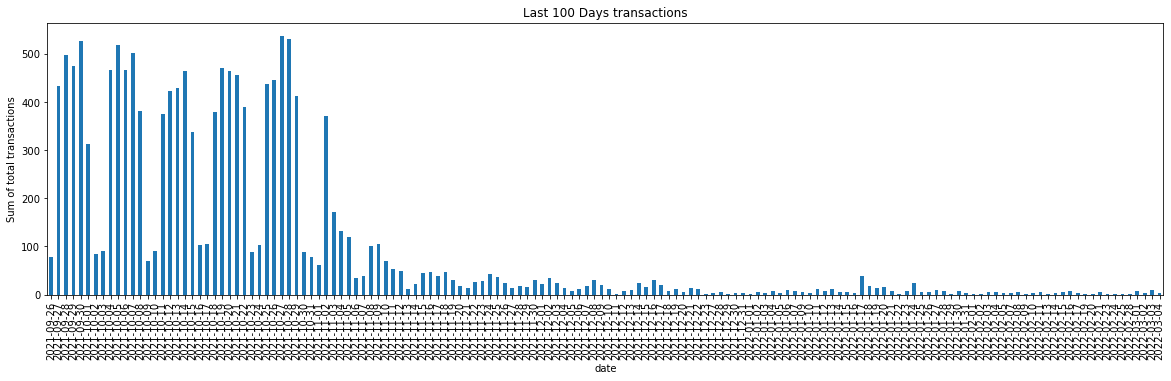

In [30]:
plt.figure(figsize=(20,5))
plt.title('Last 100 Days transactions')
plt.ylabel('Sum of total transactions')
ops['sum'].tail(150).plot.bar()


<AxesSubplot:title={'center':'Last 100 Days transactions'}, xlabel='date', ylabel='Sum of event_related transactions'>

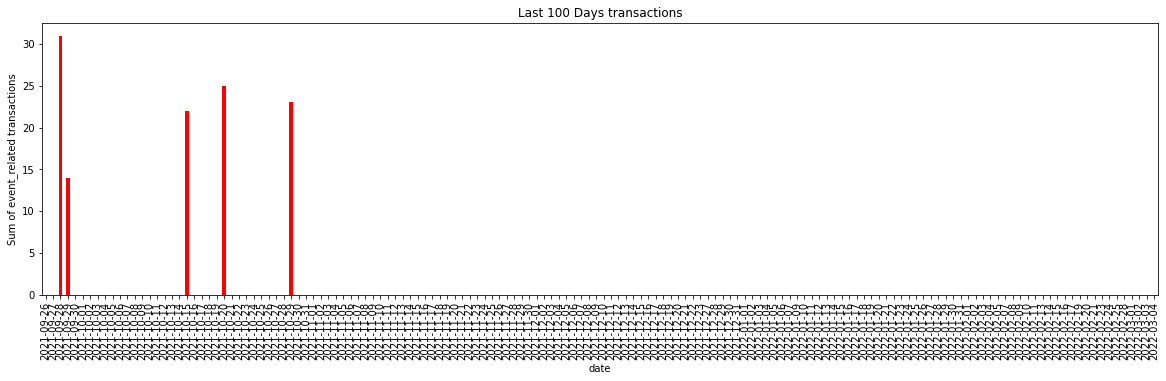

In [31]:
plt.figure(figsize=(20,5))
plt.title('Last 100 Days transactions')
plt.ylabel('Sum of event_related transactions')
ops['event_sum'].tail(150).plot.bar(color='red')

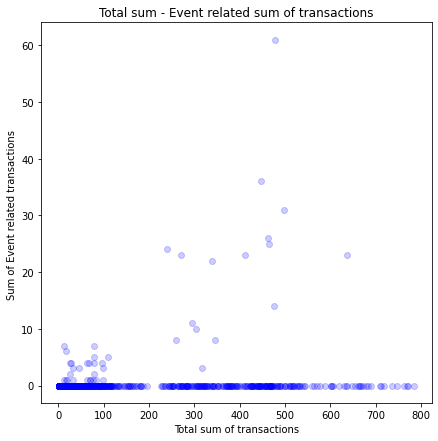

In [32]:
plt.figure(figsize=(7, 7))
plt.title('Total sum - Event related sum of transactions')

x = ops['sum']
y = ops['event_sum']


plt.scatter(x, y,  c="b", alpha=0.2)
plt.xlabel("Total sum of transactions")
plt.ylabel("Sum of Event related transactions ")
#plt.legend(loc='upper left')
plt.show()


Portion of event related transactions 0.34597005934404074 %


<AxesSubplot:ylabel='Frequency'>

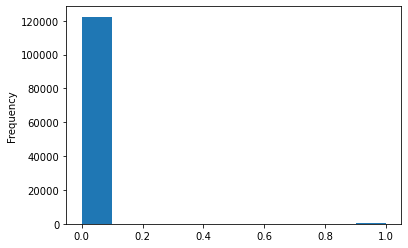

In [33]:
print('Portion of event related transactions',out_df['event_value'].sum()/out_df.shape[0]*100,'%')

out_df['event_value'].plot.hist()

In [34]:
from scipy.stats import pearsonr
pearsonr(ops['sum'],ops['event_sum']) # corr and p_val

(0.1563579826783159, 5.942122413263997e-06)

In [35]:
out_df.head()

,Unnamed: 0,OwnerId,NextOwnerId,ContainerId,OwnerSince,OwnerTill,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry,date,event_value
0,1,e5c7976f-92fb-408f-b852-01b98ba1723d,d9d8a373-29f0-4fe5-8f17-39669083ac48,c33c72e1-8a28-4ee5-b367-8ea36f13e00e,2019-09-23 09:29:08.691234+02:00,2019-10-08 13:27:17.176081+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151),2019-10-08,0
1,3,e5c7976f-92fb-408f-b852-01b98ba1723d,cb1f92f7-ffbb-43a6-b741-b1d71cb2a157,fd9c6ffb-38f4-4f14-b18b-86aca4681a5d,2019-09-23 09:29:29.218375+02:00,2019-09-30 13:02:20.269511+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151),2019-09-30,0
2,4,e5c7976f-92fb-408f-b852-01b98ba1723d,d8d04bd1-1ec0-41ec-8a1b-0ea8ec8cde0b,2dd2c669-c1bc-4caa-8c27-0406a3249344,2019-09-23 09:29:38.014684+02:00,2019-10-22 17:27:14.913824+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151),2019-10-22,0
3,5,e5c7976f-92fb-408f-b852-01b98ba1723d,c33384cb-ad0d-4f51-8eae-61ab029325e6,c28af90c-b5cb-4954-a72f-dc3a3b6ad127,2019-09-23 09:29:45.194717+02:00,2019-10-09 12:10:59.598978+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151),2019-10-09,0
4,6,e5c7976f-92fb-408f-b852-01b98ba1723d,ca2baa32-10d6-4757-87fd-ed1be617ed24,4adebd4d-3d9f-45e2-8d3d-388b2a495dec,2019-09-23 09:29:52.429365+02:00,2019-09-27 11:42:49.104503+02:00,True,NaN,1.0,e20e6c15-6507-4427-8b68-e1d1f870b924,NaN,False,False,storeappuser,consumer,POINT (2566096.0567991943 5646020.265491151),2019-09-27,0


In [36]:
hot_list=out_df[out_df['event_value']==1]['owner_store_id'].unique()

In [37]:
out_df[out_df['owner_store_id'].isin(hot_list)].shape

(41306, 18)

In [38]:
out_df[out_df['owner_store_id'].isin(hot_list)==False].shape

(81537, 18)

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

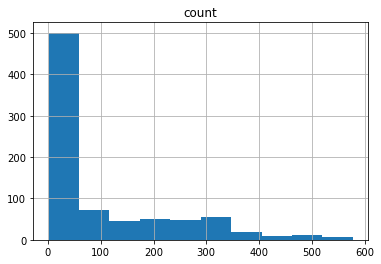

In [39]:
# Distribution of daily transactions 
out_df[out_df['owner_store_id'].isin(hot_list)==False].groupby('date').size().to_frame('count').hist()

<AxesSubplot:>

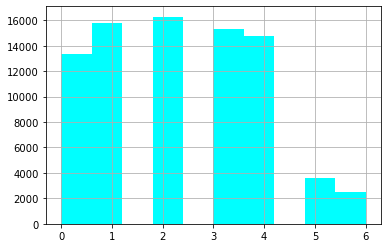

In [40]:
# day distribution
out_df[out_df['owner_store_id'].isin(hot_list)==False]['OwnerSince'].dt.dayofweek.hist(color='cyan')

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

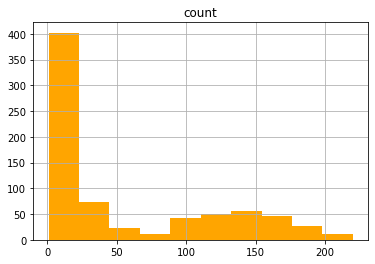

In [41]:
out_df[out_df['owner_store_id'].isin(hot_list)==True].groupby(out_df['date']).size().to_frame('count').hist(color='orange')

<AxesSubplot:>

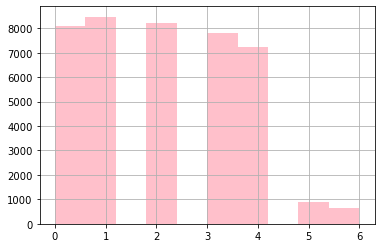

In [42]:
# day distribution
out_df[out_df['owner_store_id'].isin(hot_list)==True]['OwnerSince'].dt.dayofweek.hist(color='pink')
# day distributions are almost identical.
# Thus day of the events does not play a role in the samples.
# We can now compare both distributions.

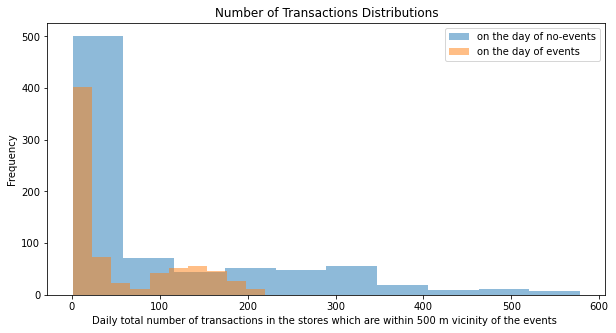

In [43]:
plt.figure( figsize=(10,5))
plt.title('Number of Transactions Distributions')

plt.hist(out_df[out_df['owner_store_id'].isin(hot_list)==False].groupby('date').size().to_frame('count'), \
         alpha=0.5, label='on the day of no-events')
plt.hist(out_df[out_df['owner_store_id'].isin(hot_list)==True].groupby('date').size().to_frame('count'),  \
         alpha=0.5, label='on the day of events')
plt.legend(loc='upper right')
plt.xlabel("Daily total number of transactions in the stores which are within 500 m vicinity of the events ")
plt.ylabel("Frequency")
plt.show()

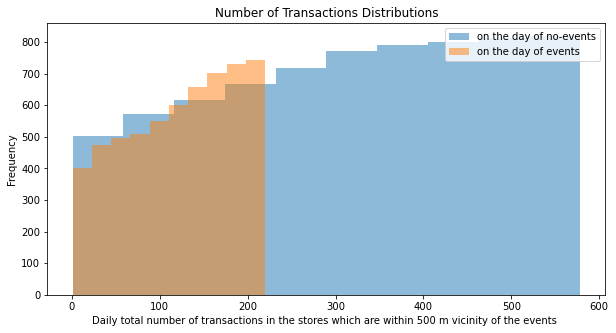

In [44]:
# Cumulative
plt.figure( figsize=(10,5))
plt.title('Number of Transactions Distributions')

plt.hist(out_df[out_df['owner_store_id'].isin(hot_list)==False].groupby('date').size().to_frame('count'), \
         alpha=0.5, label='on the day of no-events', cumulative=1)
plt.hist(out_df[out_df['owner_store_id'].isin(hot_list)==True].groupby('date').size().to_frame('count'),  \
         alpha=0.5, label='on the day of events', cumulative=1)
plt.legend(loc='upper right')
plt.xlabel("Daily total number of transactions in the stores which are within 500 m vicinity of the events ")
plt.ylabel("Frequency")
plt.show()

In [45]:
# compare two distributions statistically. 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

from scipy.stats import ks_2samp
# null hypothesis: their distributions are identical, 
# alternative: not identical

ks_2samp(out_df[out_df['owner_store_id'].isin(hot_list)==False].groupby('date').size(),\
         out_df[out_df['owner_store_id'].isin(hot_list)==True].groupby('date').size(), alternative='two-sided')
# we reject null hypothesis in favor of the alternative because pvalue is low.

KstestResult(statistic=0.20276683484230654, pvalue=1.7047758454184458e-14)

In [46]:
# less:   The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

ks_2samp(out_df[out_df['owner_store_id'].isin(hot_list)==False].groupby('date').size(),\
         out_df[out_df['owner_store_id'].isin(hot_list)==True].groupby('date').size(), alternative='less')
# we reject null hypothesis 

KstestResult(statistic=0.20276683484230654, pvalue=1.0253746507323415e-14)

In [47]:
# greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.
ks_2samp(out_df[out_df['owner_store_id'].isin(hot_list)==False].groupby('date').size(),\
         out_df[out_df['owner_store_id'].isin(hot_list)==True].groupby('date').size(), alternative='greater')


KstestResult(statistic=0.0, pvalue=1.0)